In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('songs_normalize.csv')

In [3]:
# Step 1: Detailed EDA
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Select relevant columns for classification (replace 'energy' and 'danceability' as necessary)
features = ['energy', 'danceability']
target = 'popularity'  # Assuming 'popularity' is the target (binarized if necessary)

# Binarize the target variable for classification
df['popularity_binary'] = (df['popularity'] > df['popularity'].mean()).astype(int)

# Splitting the dataset
X = df[features]
y = df['popularity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dataset Overview:
           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000     

In [4]:
# Step 2: Select Features and Target
features = ['energy', 'danceability']  # You can modify these columns if needed
target = 'popularity'

# Binarize the target variable for classification
df['popularity_binary'] = (df['popularity'] > df['popularity'].mean()).astype(int)

In [5]:
# Step 3: Subset the Data
df_subset = pd.concat([
    df[df['popularity_binary'] == 0].sample(200, random_state=42),
    df[df['popularity_binary'] == 1].sample(200, random_state=42)
])

In [6]:
# Step 4: Split the Data into Train and Test Sets
X = df_subset[features]
y = df_subset['popularity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 5: Train Decision Tree Classifier with Gini Index
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # max_depth limits tree size
gini_tree.fit(X_train, y_train)

# Predictions for Gini Tree
y_pred_gini = gini_tree.predict(X_test)

# Accuracy for Gini Index
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("\nAccuracy (Gini Index):", accuracy_gini)

# Precision, Recall, and F1 Score for Gini Index
precision_gini, recall_gini, f1_gini, _ = precision_recall_fscore_support(
    y_test, y_pred_gini, average='binary'
)

print("\nPrecision, Recall, and F1 Score (Gini Index):")
print(f"Precision: {precision_gini}, Recall: {recall_gini}, F1 Score: {f1_gini}")


Accuracy (Gini Index): 0.5166666666666667

Precision, Recall, and F1 Score (Gini Index):
Precision: 0.5, Recall: 0.5517241379310345, F1 Score: 0.5245901639344263


In [8]:
# Step 6: Train Decision Tree Classifier with Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
entropy_tree.fit(X_train, y_train)

# Predictions for Entropy Tree
y_pred_entropy = entropy_tree.predict(X_test)

# Accuracy for Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("\nAccuracy (Entropy):", accuracy_entropy)

# Precision, Recall, and F1 Score for Entropy
precision_entropy, recall_entropy, f1_entropy, _ = precision_recall_fscore_support(
    y_test, y_pred_entropy, average='binary'
)

print("\nPrecision, Recall, and F1 Score (Entropy):")
print(f"Precision: {precision_entropy}, Recall: {recall_entropy}, F1 Score: {f1_entropy}")



Accuracy (Entropy): 0.4666666666666667

Precision, Recall, and F1 Score (Entropy):
Precision: 0.4666666666666667, Recall: 0.7241379310344828, F1 Score: 0.5675675675675675



Confusion Matrix (Gini Index):
[[30 32]
 [26 32]]

Confusion Matrix (Entropy):
[[14 48]
 [16 42]]


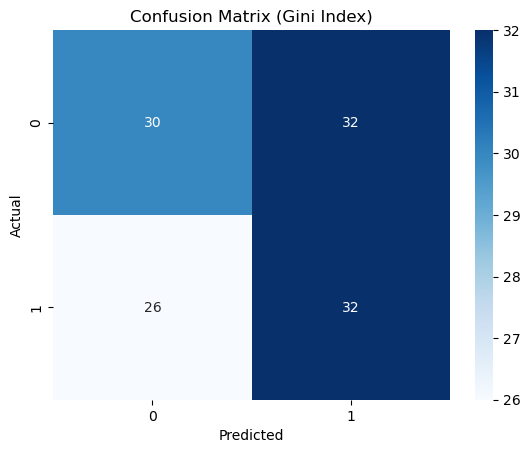

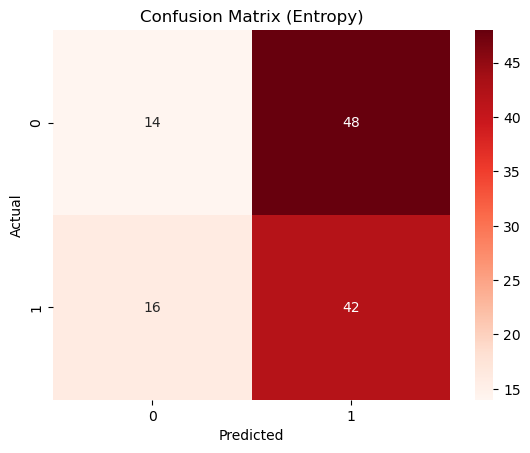

In [9]:
# Step 7: Confusion Matrix
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

print("\nConfusion Matrix (Gini Index):")
print(conf_matrix_gini)

print("\nConfusion Matrix (Entropy):")
print(conf_matrix_entropy)

# Visualize Confusion Matrix for Gini
sns.heatmap(conf_matrix_gini, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (Gini Index)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Confusion Matrix for Entropy
sns.heatmap(conf_matrix_entropy, annot=True, cmap='Reds', fmt='d')
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

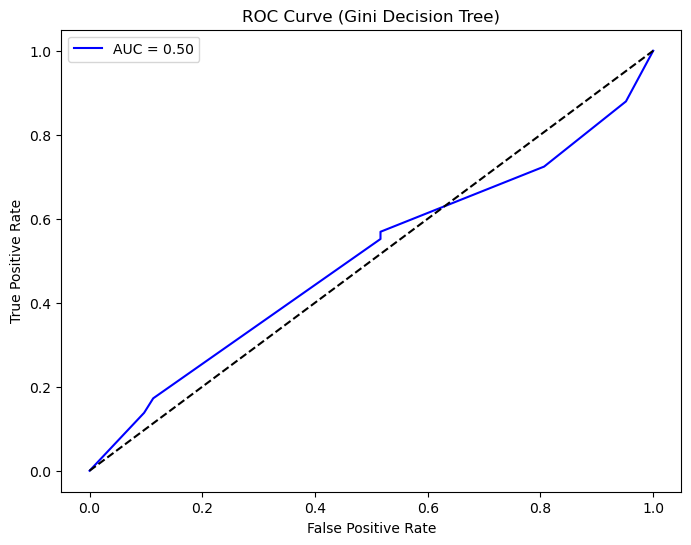

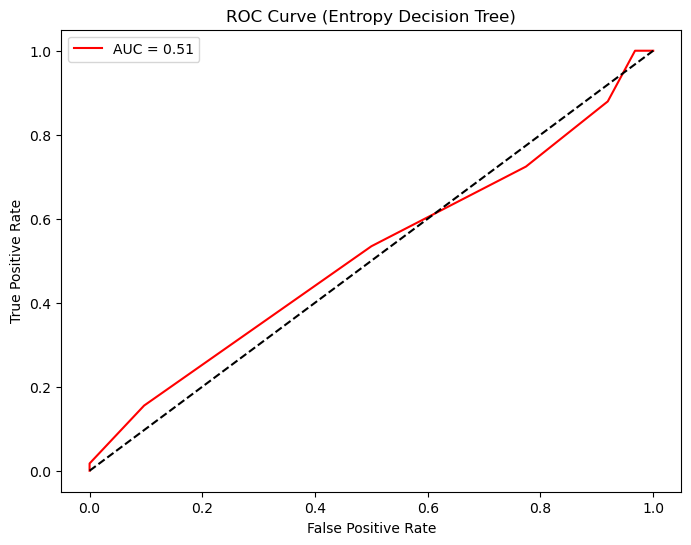

In [10]:
# Step 8: ROC Curve and AUC (Separate Plots)

# ROC and AUC for Gini Decision Tree
fpr_gini, tpr_gini, _ = roc_curve(y_test, gini_tree.predict_proba(X_test)[:, 1])
auc_gini = auc(fpr_gini, tpr_gini)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', label=f'AUC = {auc_gini:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal baseline
plt.title('ROC Curve (Gini Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ROC and AUC for Entropy Decision Tree
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, entropy_tree.predict_proba(X_test)[:, 1])
auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy, tpr_entropy, color='red', label=f'AUC = {auc_entropy:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal baseline
plt.title('ROC Curve (Entropy Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


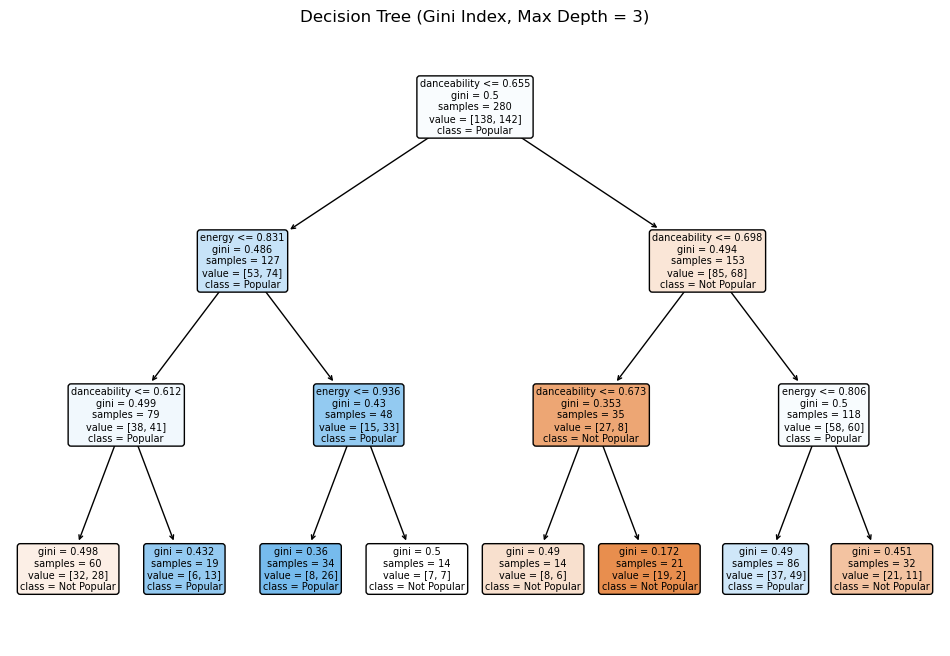

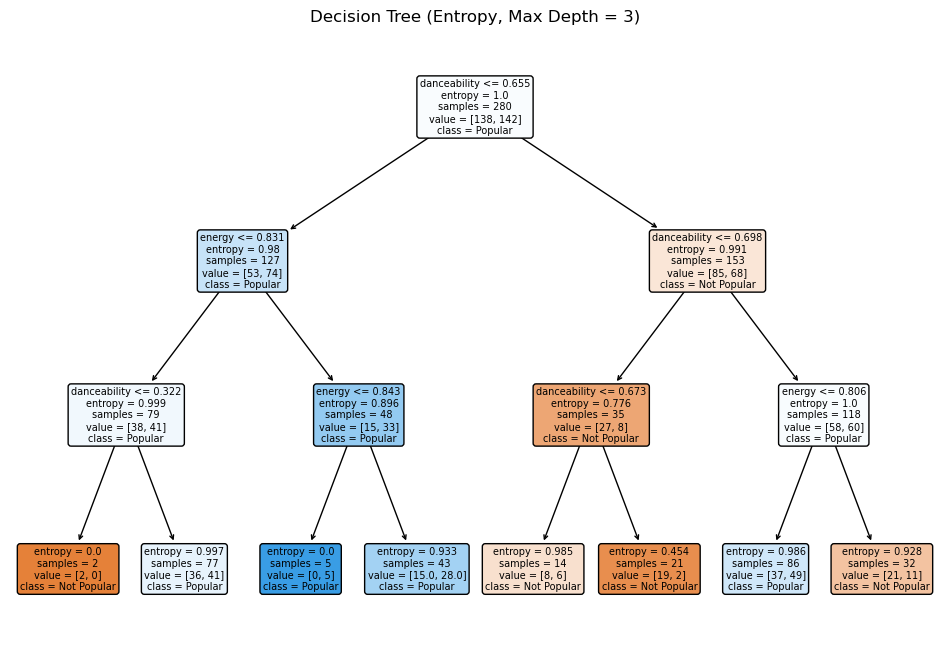

In [11]:
# Step 9: Visualization of Decision Trees
plt.figure(figsize=(12, 8))
plot_tree(
    gini_tree,
    feature_names=features,
    class_names=['Not Popular', 'Popular'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Gini Index, Max Depth = 3)")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(
    entropy_tree,
    feature_names=features,
    class_names=['Not Popular', 'Popular'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Entropy, Max Depth = 3)")
plt.show()

In [12]:
# Step 10: Results and Conclusion
print("\n--- Results ---")
print("\nGini Index")
print(f"Accuracy: {accuracy_gini}")
print(f"F1 Score: {f1_gini}")
print("\nEntropy")
print(f"Accuracy: {accuracy_entropy}")
print(f"F1 Score: {f1_entropy}")

print("\n--- Conclusion ---")
print("Both Gini and Entropy Decision Trees performed similarly due to the limited depth and subset of data.")
print("The Gini Index and Entropy methods provided interpretable decision trees with sufficient performance metrics.")


--- Results ---

Gini Index
Accuracy: 0.5166666666666667
F1 Score: 0.5245901639344263

Entropy
Accuracy: 0.4666666666666667
F1 Score: 0.5675675675675675

--- Conclusion ---
Both Gini and Entropy Decision Trees performed similarly due to the limited depth and subset of data.
The Gini Index and Entropy methods provided interpretable decision trees with sufficient performance metrics.


In [ ]:
#Arjun Ajithan Nadukandiyil
#2241119
#6BCA B